# Прогнозирование вероятности оттока пользователей для фитнес-центров

***Описание проекта***

  В рамках проекта необходимо на основе данных о посетителях сети фитнес-центров спрогнозировать  вероятность оттока для каждого клиента в следующем месяце, сформировать с помощью кластеризации портреты пользователей, сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства, проанализировать основные признаки, наиболее сильно влияющие на отток, сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами: выделить целевые группы клиентов, предложить меры по снижению оттока, определить другие особенности взаимодействия с клиентами.

***Краткое описание данных, представленных в датасете***
   
   *Данные в датасете gym_churn*
   
    'Churn' — факт оттока в текущем месяце;
    
    Текущие поля в датасете:
    Данные клиента за предыдущий до проверки факта оттока месяц:
    'gender' — пол;
    'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    'Partner' — сотрудник компании-партнёра клуба;
    'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга»;
    'Phone' — наличие контактного телефона;
    'Age' — возраст;
    'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

    Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    'Group_visits' — факт посещения групповых занятий;
    'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра.

***Содержание проекта***


1. <a href='#the_destination'> Предварительная обработка данных</a>

    1.1  <a href='#the_destination1'>Загрузка необходимых библиотек</a>

    1.2. <a href='#the_destination2'>Загрузка датасета и предварительный анализ</a>
    
<a href='#the_destination3'>Вывод по разделу 1</a>
    

2. <a href='#the_destination4'>Иccледовательский анализ данных</a>

    2.1.  <a href='#the_destination5'>Анализ качества признаков</a>
    
    2.2.  <a href='#the_destination6'>Формулировка гипотез</a>
    
    2.3.  <a href='#the_destination7'>Предварительная обработка данных</a>
    
<a href='#the_destination8'>Вывод по разделу 2</a>


3.  <a href='#the_destination9'>Построение модели прогнозирования оттока клиентов</a>

    3.1.  <a href='#the_destination10'>Разделение выборки на обучающию и валидационную</a>
    
    3.2. <a href='#the_destination11'>Выбор метрик</a>
    
    3.3.  <a href='#the_destination12'>Обучение модели логистической регрессией</a>
    
    3.4.  <a href='#the_destination13'>Обучение модели случайным лесом</a>
    
    3.5.  <a href='#the_destination14'>Сравнение моделей по метрикам</a>

<a href='#the_destination15'>Вывод по разделу 3</a>
    
    
4.  <a href='#the_destination16'>Кластеризация клиентов</a>
    
    4.1.  <a href='#the_destination17'>Построение матрицы расстояний и визуализация дендрограммы</a>
    
    4.2.  <a href='#the_destination18'>Обучение модели на основании алгоритма K-Means и прогнозирование кластеров клиентов</a>

    4.3.  <a href='#the_destination19'>Построение распределения признаков для кластеров</a>
    
    4.4. <a href='#the_destination20'>Расчет доли оттока по каждому кластеру</a>

<a href='#the_destination21'>Вывод по разделу 4</a>


<a href='#the_destination22'>Общий вывод и рекомендации по работе с клиентами</a>

<a id='the_destination'></a>
# 1. Предварительная обработка данных

<a id='the_destination1'></a>
## 1.1. Загрузка необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

<a id='the_destination2'></a>
## 1.2. Загрузка датасета и предварительный анализ

In [2]:
#прочитаем из csv-файла данные 
gym = pd.read_csv('/datasets/gym_churn.csv')

#распечатаем его размер и первые 5 строк
print("\033[1m", 'Размер датасета', "\033[0m", '\n', gym.shape)
display(gym.head())

#посмотрим на сводную информацию о наборе данных
print('\033[1m', 'Информация о наборе данных', '\033[0m')
print(gym.info())

 Размер датасета  
 (4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


 Информация о наборе данных 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


В данных 4000 наблюдений и 14 полей. Все признаки переведены в численный вид, категориальных признаков нет. Пропущенных значений нет.

<a id='the_destination3'></a>
# Вывод по разделу 1.

В представленном датафрейме приведены данные о 4000 наблюдений, что является достаточно большим количеством наблюдений, и подходит для дальнейшего построения моделей. Среди 14 признаков все признаки переведены в численный вид. Пропущенных значений нет, поэтому заполенения или удаления пропусков не требуется.

<a id='the_destination4'></a>
# 2. Исследовательский анализ данных

<a id='the_destination5'></a>
## 2.1. Анализ качества признаков

Как показал предварительный анализ - пропущенных признаков нет, все признаки представленны в численном виде. 

In [3]:
# изучение средних значений и стандартных отклонений
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Проанлизировав средние значения для признаков бинарного типа можно сделать вывод, что количество мужчин и женщин в выборке примерно одинаково, большинство ходят в фитнес-клубы расположенные в районе работы или проживания, около половины клиентов являются сотрудниками компаний парнеров-клуба, около трети клиентов воспользовались промо акцией, у большинства указан телефон, около половины клиентов посещают групповые занятия, около трети клиентов перестали ходить в зал в текущем месяце.

Для небинарных признаков можно сделать следующие выводы: средний период контракта составляет 4,7 месяца, средний возраст клиента - 29 лет, средняя выручка от суммарных дополнительных услуг фитнес-клуба составляет 147 единиц, средний срок до окончания контракта составляет 4,3 месяца, среднее время с момента первого посещения - 3,7 месяца, средняя частота посещений зала в неделю за все время с начала действия абонемента составляет 2 визита, средняя частота посещений в неделю за предыдущий месяц - 2 визита. 
Для признака возраст - стандартное отклонение не велико, поэтому можно говорить о небольшом разбросе в значениях возраста клиентов, остальные небинарные признаки имеют достаточно большое стандартное отклоение, что говорит о большом разбросе в их значениях.

<a id='the_destination6'></a>
## 2.2. Формулировка гипотез

Проанализируем средние значения признаков для группы ушедгих в отток клиентов и тех, кто остался.

In [4]:
# Формирование групп постоянных клиентов и ушедших в отток patrons

patrons = gym.groupby(by=['Churn'])
# Демонстрация полного содержимого таблицы
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
# Формирование таблицы с стандартными отклонениями и средними значениями
patrons.describe()

gender                                              Near_Location  \
        count      mean       std  min  25%  50%  75%  max         count   
Churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0  2939.0         
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0  1061.0         

                                                   Partner            \
           mean       std  min  25%  50%  75%  max   count      mean   
Churn                                                                  
0      0.873086  0.332933  0.0  1.0  1.0  1.0  1.0  2939.0  0.534195   
1      0.768143  0.422217  0.0  1.0  1.0  1.0  1.0  1061.0  0.355325   

                                         Promo_friends                      \
            std  min  25%  50%  75%  max         count      mean       std   
Churn                                                                        
0      0.498914  0.0  0.0  1.0  1.0  1.0  2939.0        0.353522  0.478144   
1      0.478837  0.0  0.0  0.0  1.0  1.0  1061.0        0.183789  0.387495   

                                 Phone                                     \
       min  25%  50%  75%  max   count      mean       std  min  25%  50%   
Churn                                                                       
0      0.0  0.0  0.0  1.0  1.0  2939.0  0.903709  0.295040  0.0  1.0  1.0   
1      0.0  0.0  0.0  0.0  1.0  1061.0  0.902922  0.296204  0.0  1.0  1.0   

                Contract_period                                           \
       75%  max           count      mean       std  min  25%  50%   75%   
Churn                                                                      
0      1.0  1.0  2939.0          5.747193  4.716942  1.0  1.0  6.0  12.0   
1      1.0  1.0  1061.0          1.728558  2.132371  1.0  1.0  1.0  1.0    

            Group_visits                                                  Age  \
        max        count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                           
0      12.0  2939.0       0.464103  0.498795  0.0  0.0  0.0  1.0  1.0  2939.0   
1      12.0  1061.0       0.268615  0.443448  0.0  0.0  0.0  1.0  1.0  1061.0   

                                                          \
            mean       std   min   25%   50%   75%   max   
Churn                                                      
0      29.976523  3.009933  19.0  28.0  30.0  32.0  41.0   
1      26.989632  2.895163  18.0  25.0  27.0  29.0  38.0   

      Avg_additional_charges_total                                   \
                             count        mean        std       min   
Churn                                                                 
0      2939.0                       158.445715  99.801599  0.171862   
1      1061.0                       115.082899  77.696419  0.148205   

                                                    Month_to_end_contract  \
             25%         50%         75%        max                 count   
Churn                                                                       
0      76.920993  149.881171  224.448274  552.59074  2939.0                 
1      50.629127  103.814686  165.616858  425.53522  1061.0                 

                                                     Lifetime            \
           mean       std  min  25%  50%   75%   max    count      mean   
Churn                                                                     
0      5.283089  4.363522  1.0  1.0  6.0  10.0  12.0  2939.0   4.711807   
1      1.662582  1.964593  1.0  1.0  1.0  1.0   12.0  1061.0   0.990575   

                                          Avg_class_frequency_total            \
            std  min  25%  50%  75%   max                     count      mean   
Churn                                                                           
0      3.874780  0.0  2.0  4.0  6.0  31

Группа ушедших клиентов в 3 раза меньше количества оставшихся клиентов. 
Для обеих групп клиентов характерно примерно одинаковое соотношение мужчин и женщин среди клиентов, среди ушедших клиентов н 10% больше клиентов, живущих и работающих не вблизи зала, среди ушедших клиентов на 20% меньше клиентов компаний партнеров зала, среди ушедших клиентво в 2 раза меньше клиентов, воспользовавшихся промо-кодом, среди ушедших клиентов средняя длительность контраста существенно ниже и составляет около 2 месяцев, тогда как для оставшихся клиентов это около 6 месяцев, среди ушедших клиентов на 20% меньше клиентов посещали групповые занятия, их средний возраст чуть меньше, чем для оставшихся клиентов, они меньше тратили на дополнительные услуги, для ушедших клиентов средний срок до завершения контракта составляет 2 месяца, а для оставшихся - 5 месяцев, среднее время с момента первого обращения для ушедших клиентов составляет около месяца, а для оставшихся - почти 5, среднее количество визитов в месяц для ушедщих клиентов составляет 1 визит в неделю, для оставшихся 2.
То есть можно сказать, что среди ушедших клиентов больше клиентов с короткими контрактами, они реже посещали зал и реже посещали групповые занятия, их средний возраст составлял 26 лет, тогда как для оставшихся клиентов он ближе к 29 годам.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

In [5]:
# создание функции построение гистограмм распределения
def hist_for_features(df, fn):
    
    for name in features_names:
        # создание иллюстрации
        fig = plt.figure(figsize=(15, 5))
        
        df0 = df.query('Churn == 0')
        df1 = df.query('Churn == 1')
        
        # построение гистограммы
        graph1 = sns.distplot(df0[name], bins=50)

        # построение гистограммы
        graph2 = sns.distplot(df1[name], bins=50, ax=graph1)
        
        plt.title('Гистограмма распределения по признаку ' + name)
        graph1.set(xlabel='Значение признака', ylabel='Частота')
        plt.grid(True)
        graph1.legend(['оставшиеся клиенты', 'ушедшие клиенты'])
        plt.show()

In [6]:
# создание списка наименования признаков
features_names = gym.columns
print(features_names)

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')


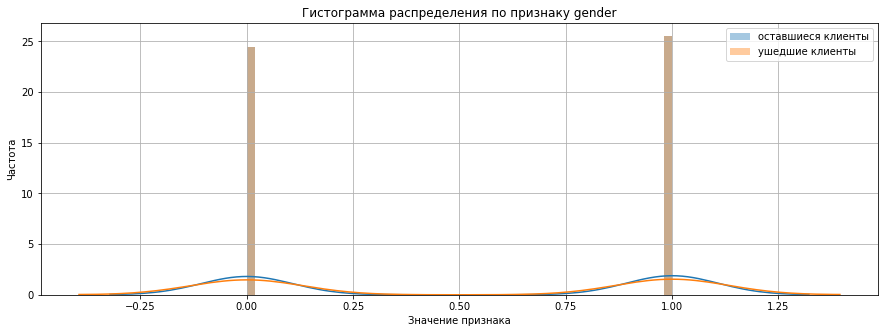

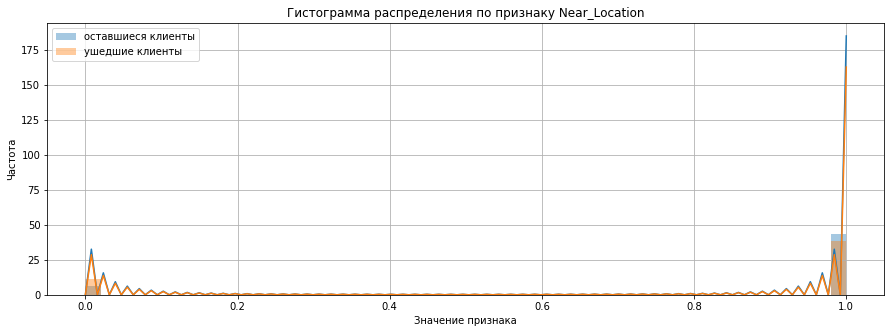

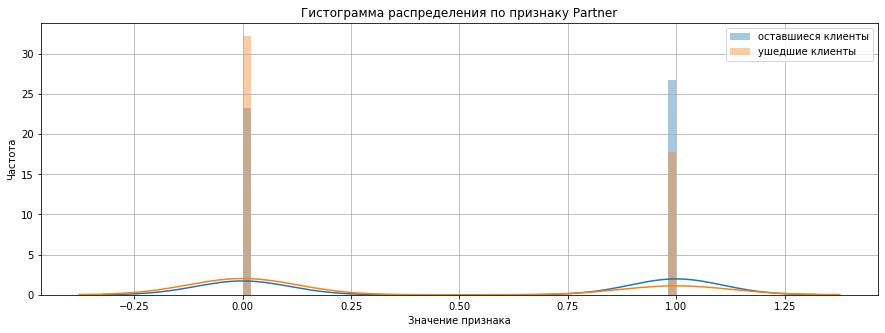

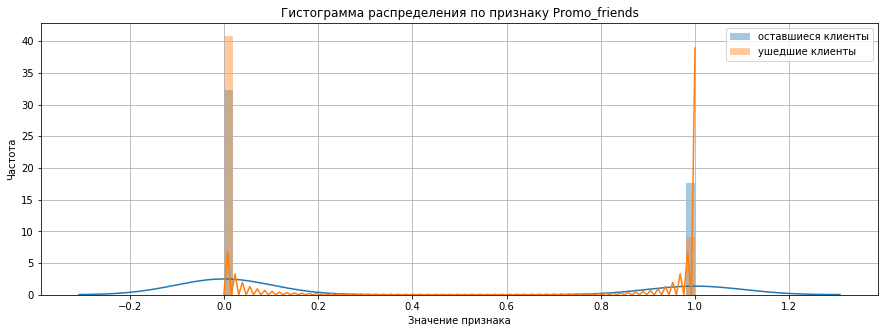

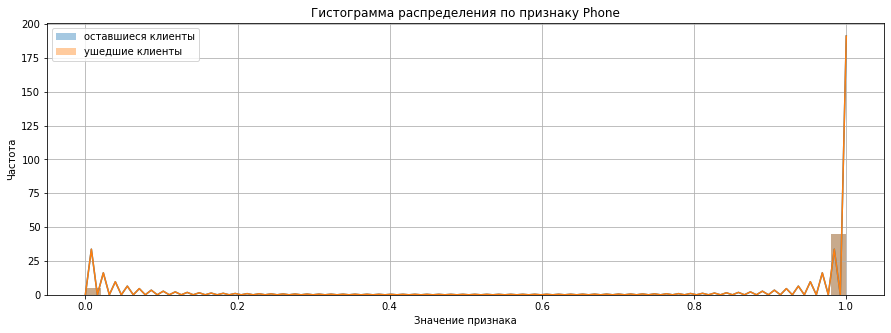

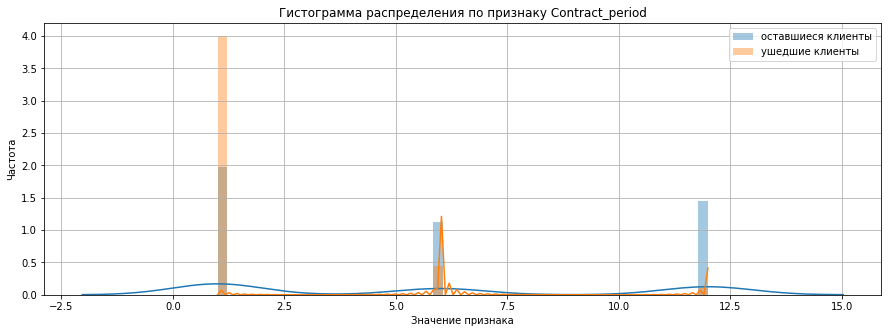

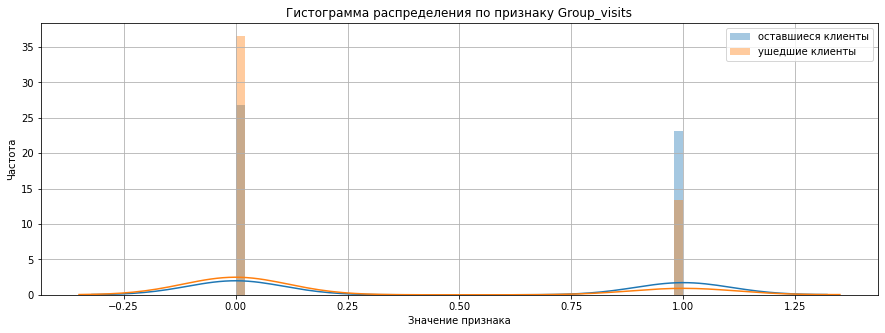

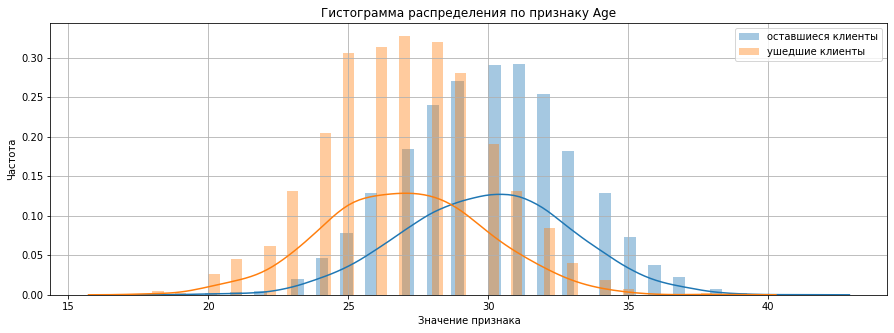

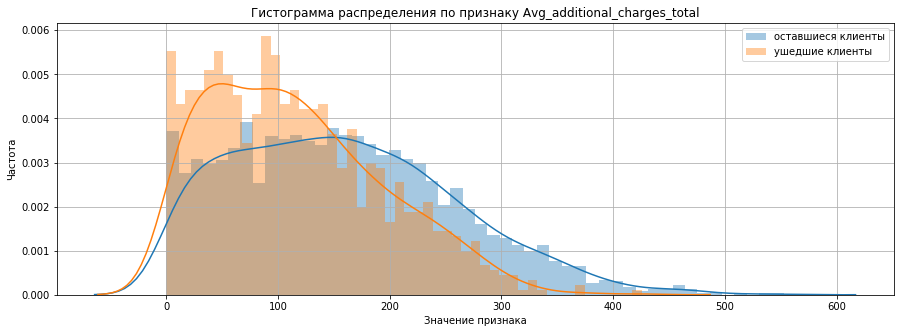

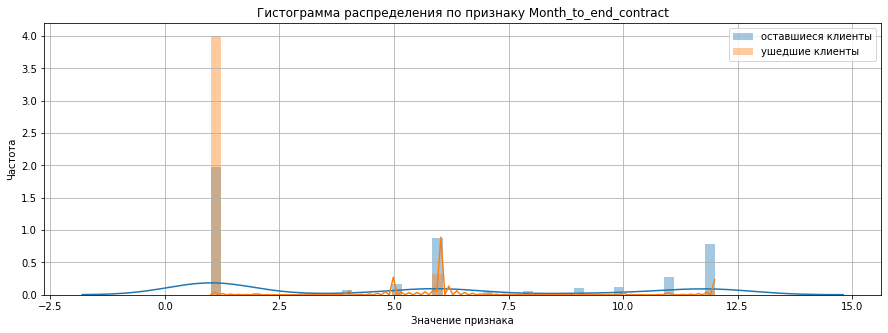

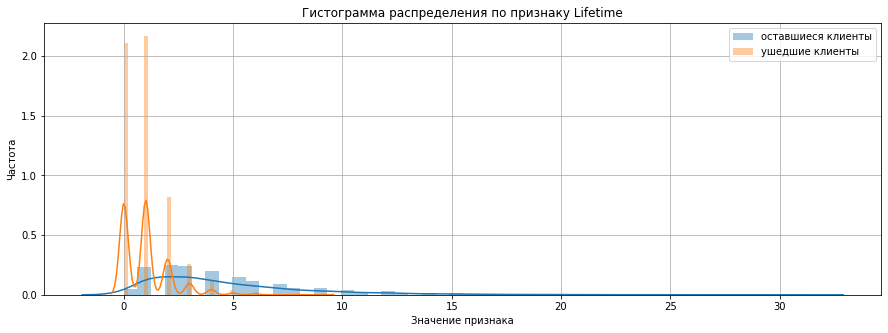

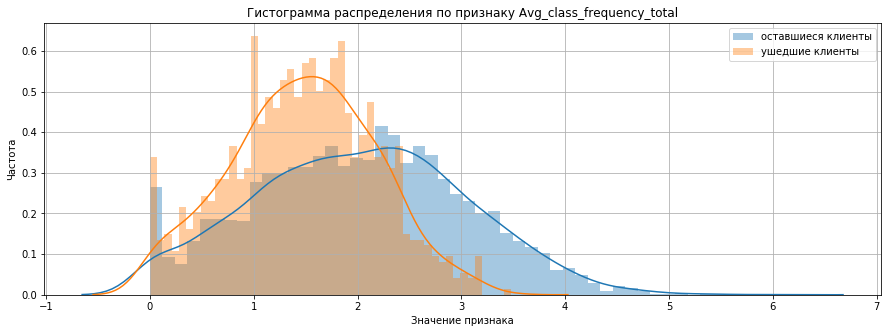

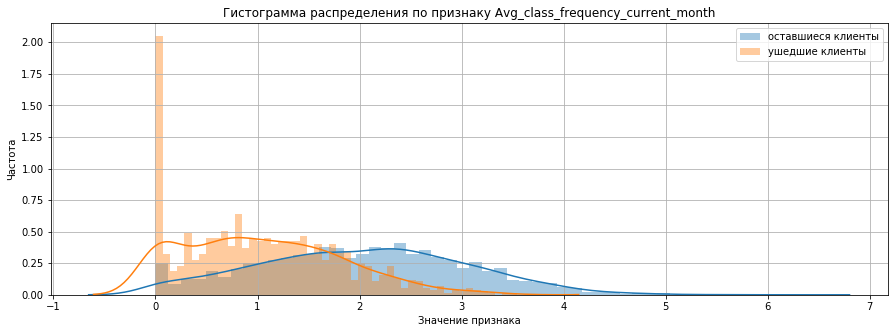

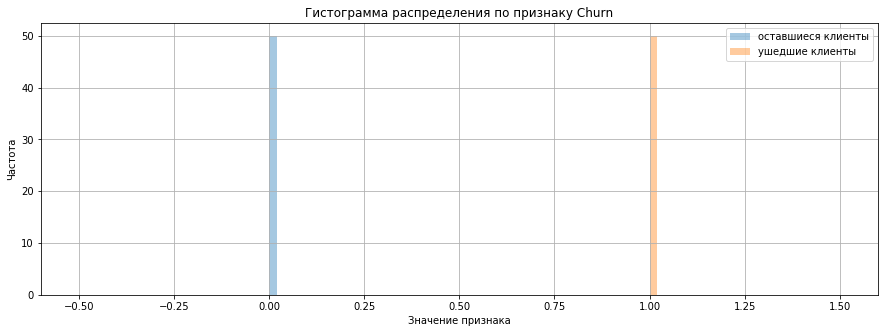

In [7]:
hist_for_features(gym, features_names)

Полученные гистограммы подтверждают ранее сформулированные утверждения. Также необходимо отметить, что распределение значений для признаков возраст и средняя частота посещений в неделю за все время с начала действия абонемента для оставшихся и ушедших клиентов является нормальным, также распределение по признаку время с момента первого обращения в фитнес-центр (в месяцах) и средняя частота посещений в неделю за предыдущий месяц для оставшихся клиентов также близки к нормальным. В распределениях по всем небиномиальным признакам, кроме возраста, присутствуют выбросы, однако не очень значительные.

Построим матрицу корреляций и отобразим ее в виде heatmap.

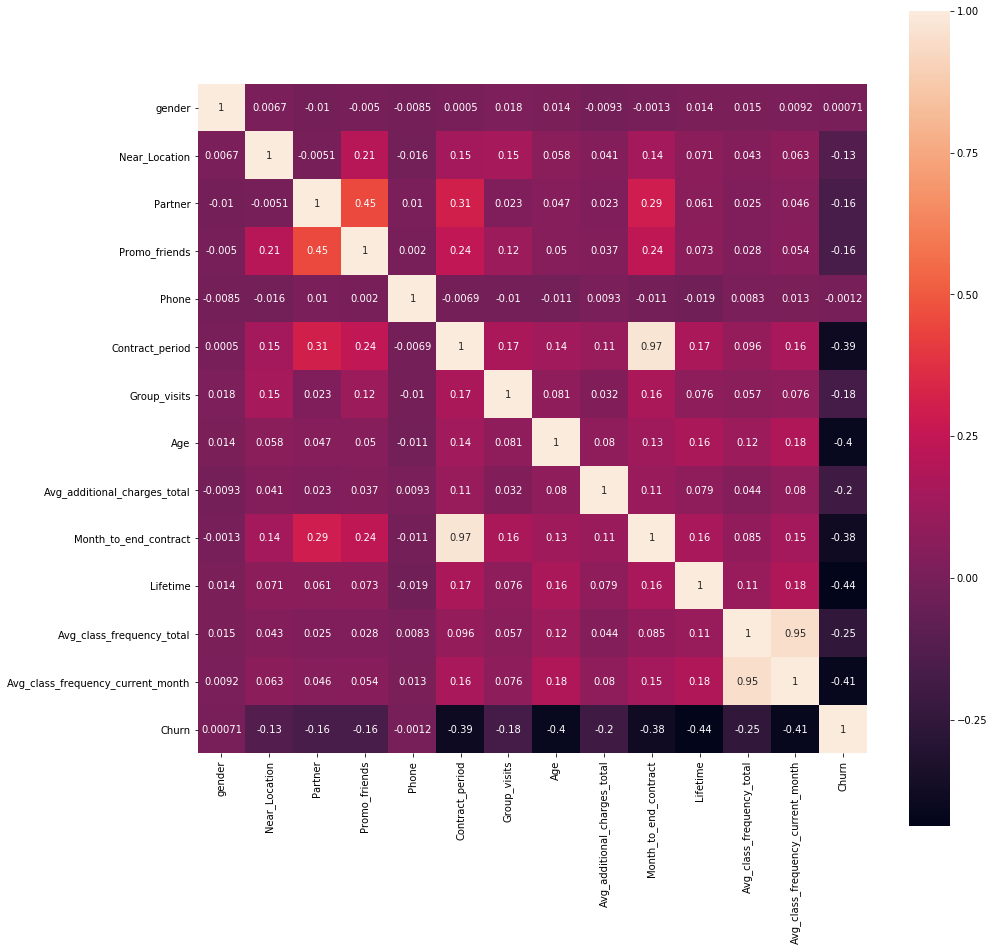

In [8]:
#построим и отрисуем матрицу корреляций
gym_matrix = gym.corr() #вычисляем матрицу корреляций

fig, ax = plt.subplots(figsize=(15,15))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(gym_matrix, annot=True, square=True) 
plt.show()

Как хорошо видно на полученной матрице наиболее сильная корреляция у признака отток клиентов с признаками длительность контракта, возраст клиента, срок до окончания текущего действующего абонемента (в месяцах), средняя частота посещений в неделю за предыдущий месяц и ремя с момента первого обращения в фитнес-центр (в месяцах). Признаки факт первоначальной записи в рамках акции «приведи друга» и сотрудник компании-партнера довольно сильно коррелируют между собой, также сильная корелляция есть между признаками "количество месяцев до окончания контракта" и "период контракта", "средняя частота посещения зала за исследуемый период" и "средняя частота посещения за последний месяц". Так как с коэффициентом оттока признаки имеют коэффициент корреляции меньше 0,5, то кореляция между ними выражена слабо.

<a id='the_destination7'></a>
## 2.3. Предварительная обработка данных

В представленном датасете отсутствуют пропуски данных. Так как выбросы в приведенных распределениях относительно незначительны, соответственно необходимости удалять наблюдения или заменять значения средним либо максимальным/минимальным значением для этого признака, выделять порога, при котором наблюдение считается выбросом, нет.

В связи с тем, что распределения отличаются от нормальных, а в дальнейшей планируется проводить кластеризацию данных, то целесообразно провести стандартизацию данных.

<a id='the_destination8'></a>
# Вывод по разделу 2

Проведя исследовательский анализ данных, можно сделать следующие выводы: 
* _Количество мужчин и женщин в выборке примерно одинаково, большинство клиентов живут или работают в районе расположения зала, около половины являются сотрудниками компаний-партнеров клуба, у большинства указан телефон, около трети клиентов воспользовались промо-акцией, около половины клиентов посещают групповые занятия, около трети клиентов перестали ходить в зал в текущем месяце._

* _Для ушедших клиентов и оставшихся средние значения признаков пол, проживание или работа в районе, где находится фитнес-центр, принадлежность клиента к компании-партнеру зала отличаются незначительно. Среди остальных признаков наиболее значительно отличаются длительность контракта, средняя частота посещений зала в неделю, среднее время с момента первого обращения и время до завершения контакта._

* _Распределения значений являются нормальными только для признаков возраст и средняя частота посещений в неделю за все время с начала действия абонемента, также в распределениях по всем небиномиальным признакам кроме возраста присутствуют выбросы. Поэтому целесообразно выполнить стандартизацию данных для построения модели._

* _Наиболее сильная корреляция у признака отток клиентов с признаками длительность контракта, возраст клиента, срок до окончания текущего действующего абонемента (в месяцах), средняя частота посещений в неделю за предыдущий месяц и ремя с момента первого обращения в фитнес-центр (в месяцах). Признаки факт первоначальной записи в рамках акции «приведи друга» и сотрудник компании-партнера довольно сильно коррелируют между собой._


<a id='the_destination9'></a>
# 3. Построение модели прогнозирования оттока клиентов

<a id='the_destination10'></a>
## 3.1. Разделение выборки на обучающую и валидационную

In [9]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop(['Churn'], axis=1)
y = gym['Churn'] 

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler =  StandardScaler()
#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st =  scaler.fit_transform(X_train) 
print(X_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st =  scaler.transform(X_test)

[[-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  1.60502986
  -0.84769226  0.57944798  0.37161711  1.59173796  1.12734972  1.75580418
   1.61822807]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125  0.31628211 -0.81299073
  -0.84769226  0.27046055 -1.09697378 -0.79568246  5.88138322 -0.2239674
  -0.01340886]
 [ 0.98511083  0.4175068   1.03175391 -0.67567125  0.31628211  1.60502986
  -0.84769226 -0.65650171 -1.18374157  1.83048     0.3350108  -0.84308456
  -0.80541199]
 [-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  0.28610954
  -0.84769226 -0.96548914 -0.95158829  0.39802775  1.39146269  0.66771379
   0.64605224]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125 -3.16173427 -0.81299073
  -0.84769226 -0.03852687  0.97190435 -0.79568246  0.07089783 -0.19587934
  -0.16038147]]


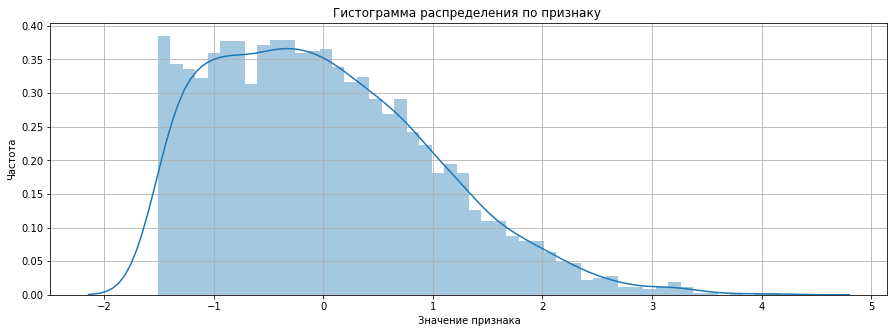

In [11]:
# создание иллюстрации
fig = plt.figure(figsize=(15, 5))

# построение гистограммы
graph = sns.distplot(X_train_st[:,8], bins=50)
plt.title('Гистограмма распределения по признаку ')
graph.set(xlabel='Значение признака', ylabel='Частота')
plt.grid(True)
plt.show()

In [12]:
# Расчет стандартного отклонения для признака средняя частота посещений в неделю за все время с начала действия абонемента после стандартизации
stats.describe(X_train_st[:,8])

DescribeResult(nobs=3200, minmax=(-1.5126292189537984, 4.169599360231844), mean=3.219646771412954e-16, variance=1.000312597686777, skewness=0.6475742343853412, kurtosis=0.06848875445630709)

После стандартизации распределение признака средняя частота посещений в неделю за все время с начала действия абонемента ябляется бимодальным распределением, но при этом среднее значение признака стремится к нулю, а стандартное единицы к единице, это говорит о том, что стандартизация проведена успешно. 

<a id='the_destination11'></a>
## 3.2. Выбор метрик

Для сравнения моделей логистической регрессии и случайного леса можно воспользоваться метриками классификации на основе значений прогнозного класса.

* ___Матрица ошибок___ (confusion matrix) - матрица ошибок отражает количество наблюдений в каждой группеу хорошей модели бóльшая часть прогнозов должна попадать в группы True Positive («истинно положительные»)  и True Negative («истинно отрицательные»).
* ___Доля правильных ответов___ (accuracy) -  доля верно угаданных ответов из всех прогнозов, чем ближе значение accuracy к 100%, тем лучше
* ___Точность___ (precision) и ___полнота___ (recall) - precision говорит, какая доля прогнозов относительно "1" класса верна, recall показывает, сколько реальных объектов "1" класса вы смогли обнаружить с помощью модели. Каждая метрика принимает значения от 0 до 1. Чем ближе к единице, тем лучше.
* ___F1_score___ - сводная метрика, учитывающая баланс между метриками, также возвращает одно число от 0 до 1. Чем ближе к единице, тем лучше.

Для сравнения моделей воспользуемся метриками доля правильных ответов, точность и полнота.

In [13]:
# функция, которая рассчитывает метрики
def classification_metrics(model, y_pred, y_test):
    
    print('Доля правильных ответов: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Точность: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Полнота: {:.2f}'.format(recall_score (y_test, y_pred)))

<a id='the_destination12'></a>
## 3.3. Обучение модели логистической регрессией

In [14]:
# Задаем алгоритм для логистической модели
model_logistic = LogisticRegression() 

# обучение логистической модель
model_logistic.fit(X_train_st, y_train)

# формирование прогнозов
predictions_logistic = model_logistic.predict(X_test_st)
probabilities_logistic = model_logistic.predict_proba(X_test_st)[:,1]

<a id='the_destination13'></a>
## 3.4. Обучение модели случайного леса

In [15]:
# Задаем алгоритм для модели случайного леса
model_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
model_forest.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions_forest =  model_forest.predict(X_test_st) 
probabilities_forest = model_forest.predict_proba(X_test_st)[:,1] 

<a id='the_destination14'></a>
## 3.5. Сравнение моделей на основании метрик

In [16]:
print('\033[1mМетрики для модели логистической регрессии\033[0m')
classification_metrics(model_logistic, predictions_logistic, y_test)
print('\033[1mМетрики для модели случайного леса\033[0m')
classification_metrics(model_forest, predictions_forest, y_test)

Метрики для модели логистической регрессии
Доля правильных ответов: 0.92
Точность: 0.85
Полнота: 0.83
Метрики для модели случайного леса
Доля правильных ответов: 0.92
Точность: 0.84
Полнота: 0.81


Для обеих моделей метрики доли правильных ответов одинаковые и составляют 0.92, однако точность и полнота для модели логистической регрессии выше, так как чем ближе эти метрики к единице, тем лучше, то модель логистической регрессии является предпочтительной.

In [17]:
# обучаем финальную модель
final_model = LogisticRegression()
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)

<a id='the_destination15'></a>
# Вывод по разделу 3.

После обучения моделей логистической регрессии и случайного дерева и расчета метрик, было определено, что ___модель логистической регрессии___ является предпочтительной, так как значения метрик точность и полнота для нее выше, чем для модели случайного дерева.

<a id='the_destination16'></a>
# 4. Кластеризация клиентов

<a id='the_destination17'></a>
## 4.1. Построение матрицы расстояний и визуализация дендрограммы

Применим методы стандартизации и нормализации к исходным признакам, передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage().

In [18]:
# Cтандартизация исходных признаков
X_sc = scaler.fit_transform(X)

In [19]:
# Формирование таблицы "связок" между объектами
linked = linkage(X_sc, method = 'ward') 

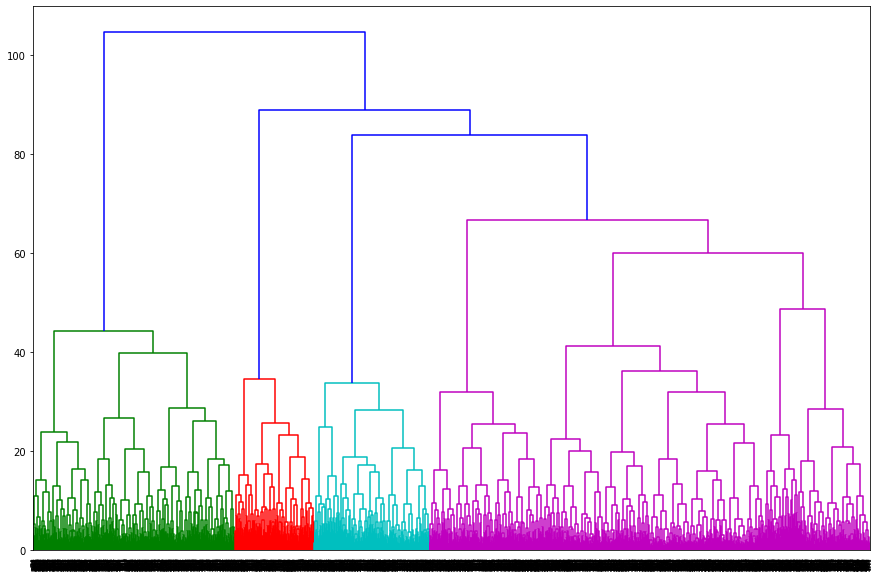

In [20]:
# визуализация дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании полученной дендрограммы можно предположить, что оптимальное число кластеров 4 — четыре разных цвета на графике.

<a id='the_destination18'></a>
## 4.2. Обучение модели на основании алгоритма K-Means и прогнозирование кластеров клиентов

In [21]:
# зададим модель k_means с числом кластеров 5
K_model =  KMeans(n_clusters = 5, random_state=6) 

# применим алгоритм к данным и сформируем вектор кластеров 
labels =  K_model.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
gym['cluster_number'] = labels

clusters = gym.groupby(['cluster_number']).mean()
display(clusters)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_number,,,,,,,,,,,,,,
0,0.564858,0.977594,0.343160,0.221698,1.0,2.550708,0.472877,30.122642,161.268043,2.349057,4.916274,2.812928,2.807517,0.074292
1,0.498531,0.960823,0.783546,0.575906,1.0,10.854065,0.539667,29.972576,161.128963,9.920666,4.723800,2.003225,1.996705,0.027424
2,0.483845,1.000000,0.355412,0.242326,1.0,1.962843,0.340065,28.144588,130.918569,1.872375,2.390953,1.233389,0.995856,0.519386
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
4,0.497041,0.000000,0.461538,0.078895,1.0,2.378698,0.218935,28.479290,135.631940,2.224852,2.812623,1.662253,1.480228,0.441815


Клиенты кластеров 1, 3 - клиенты с длительными контрактами, 0, 2, 4 - с короткими. Клиенты кластера 1 указали номер телефона, клиенты кластера 3 - нет. Клиенты кластера 0 и 2 живут или работают вблизи зала, а кластера 4 - далеко. Клиенты кластера 0 являются часто посещающими зал (3 раза в неделю), а клиенты кластера 2 -редко. 
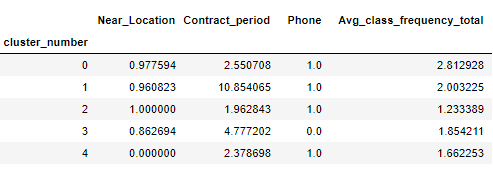
Можно сказать, что кластер 0 это часто посещающие зал клиенты с коротким контрактом, живущие и работающие вблизи зала, кластер 1 клиенты с длительными контрактами, указавшие номер телефона, кластер 2 - редко посещающие зал клиенты с коротким контрактом, живущие и работающие вблизи зала, кластер 3 - клиенты с длительными контрактами, не указавшие номер телефона, кластер 4 - клиенты с короткими контрактами, живущие и работающие далеко от зала.

<a id='the_destination19'></a>
## 4.3. Построение распределения признаков для кластеров

In [41]:
# создание функции построение гистограмм распределения
def hist_for_clusters(df, fn):
    
    for name in fn:
        # создание иллюстрации
        fig = plt.figure(figsize=(15, 5))
        
        df0 = df.query('cluster_number == 0')
        df1 = df.query('cluster_number == 1')
        df2 = df.query('cluster_number == 2')
        df3 = df.query('cluster_number == 3')
        df4 = df.query('cluster_number == 4')
        
        # построение гистограммы
        graph0 = sns.distplot(df0[name], bins=50)

        graph1 = sns.distplot(df1[name], bins=50, ax=graph0)
        
        graph2 = sns.distplot(df2[name], bins=50, ax=graph0)
        
        graph3 = sns.distplot(df3[name], bins=50, ax=graph0)
        
        graph4 = sns.distplot(df4[name], bins=50, ax=graph0)
        
        
        plt.title('Гистограмма распределения по признаку ' + name)
        graph0.set(xlabel='Значение признака', ylabel='Частота')
        plt.grid(True)
        graph0.legend(['кластер 0', 'кластер 1', 'кластер 2', 'кластер 3', 'кластер4'])
        plt.show()

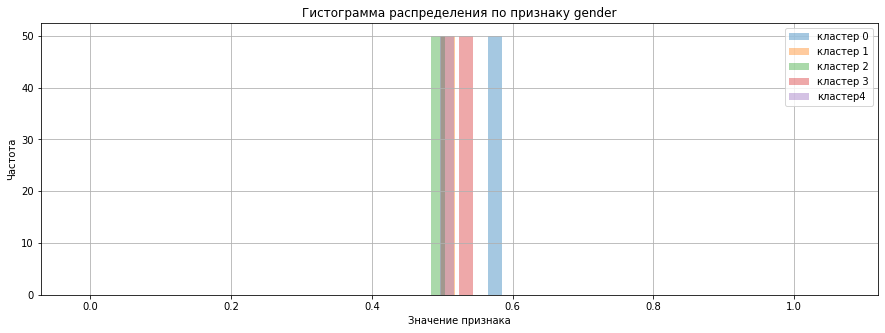

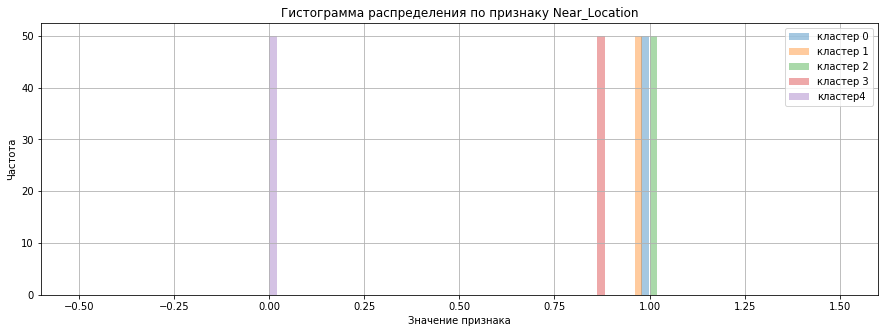

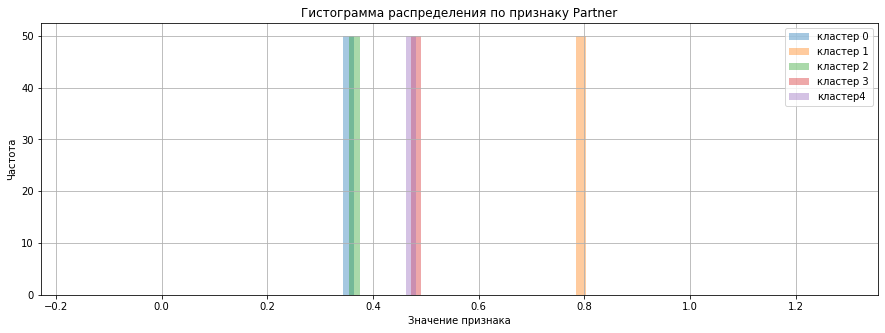

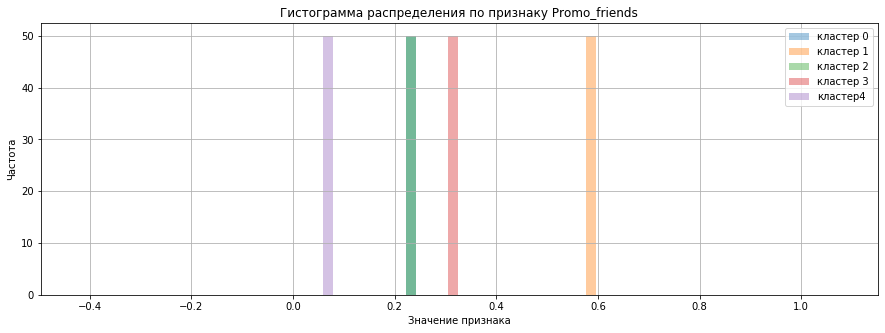

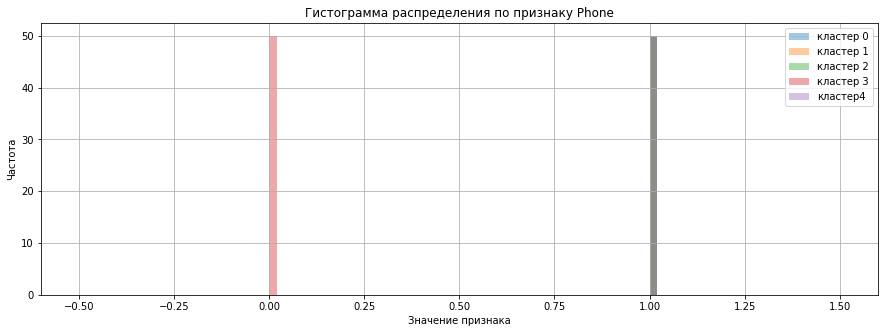

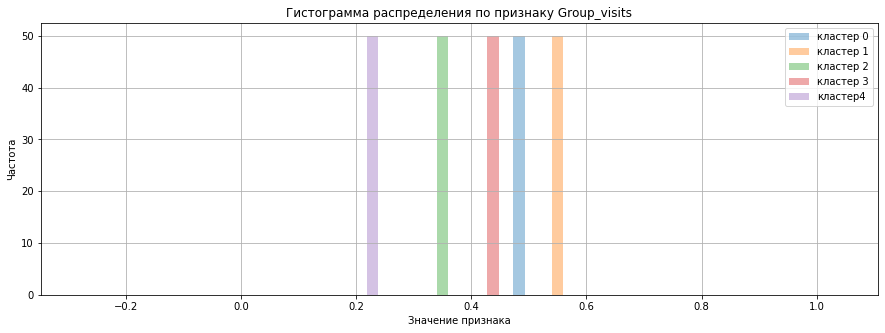

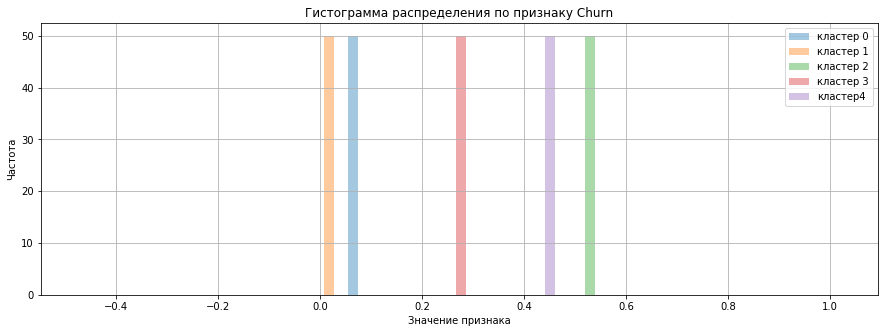

In [42]:
features_names_for_clusters = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']
hist_for_clusters(clusters, features_names_for_clusters)

На основании полученных гистограмм можно сделать следующие выводы:
    * Распределение по полу для всех кластеров примерно одинаковое
    * Клиенты кластеров 0, 1, 2, 3 проживают или работают в районе, где находится фитнес-центр, кластера 4 - далеко. 
    * Клиенты кластера 1 в основном являются сотрудниками компаний-партнеров фитнес-центра, а среди кластеров 0 и 2 сотрудников компаний-партнеров фитнес-центра практически нет
    * Среди клиентов кластера 1 многие первоначально записались в рамках акции «приведи друга», среди кластера 4 практически никто
    * Клиенты кластера 3 не указали контактный телефон
    * Клиенты кластера 1 наиболее часто посещают групповые занятия, кластера 4- наименее редко
    * Среди кластера 2 и 4 больше всего ушедших клиентов, среди кластеров 1 и 0 практически никто не ушел.

Для кластеров 1 и 3, а также 0, 2, 4 построим совмещенные на одном рисунке гистограммы по небинарным признакам.

In [46]:
# создание функции построение гистограмм распределения
def hist_for_clusters_non_binar(df, fn):
    
    for name in fn:
        # создание иллюстрации
        fig = plt.figure(figsize=(15, 5))
        
        df0 = df.query('cluster_number == 0')
        df1 = df.query('cluster_number == 1')
        df2 = df.query('cluster_number == 2')
        df3 = df.query('cluster_number == 3')
        df4 = df.query('cluster_number == 4')
        
        # построение гистограммы
        graph0 = sns.distplot(df0[name], bins=50)

        graph4 = sns.distplot(df4[name], bins=50, ax=graph0)
        
        graph2 = sns.distplot(df2[name], bins=50, ax=graph0)
        
        plt.title('Гистограмма распределения по признаку ' + name)
        graph0.set(xlabel='Значение признака', ylabel='Частота')
        plt.grid(True)
        graph0.legend(['кластер 0', 'кластер 2', 'кластер4'])
        plt.show()
        
        fig = plt.figure(figsize=(15, 5))
        graph1 = sns.distplot(df1[name], bins=50)
        
        graph3 = sns.distplot(df3[name], bins=50, ax=graph1)
        
        plt.title('Гистограмма распределения по признаку ' + name)
        graph1.set(xlabel='Значение признака', ylabel='Частота')
        plt.grid(True)
        graph1.legend(['кластер 1', 'кластер 3'])
        plt.show()

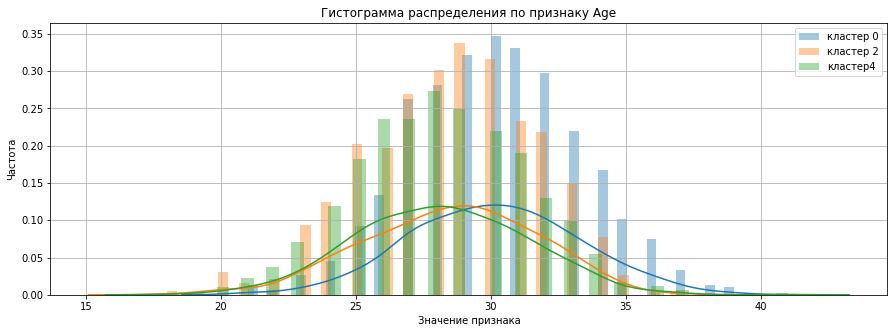

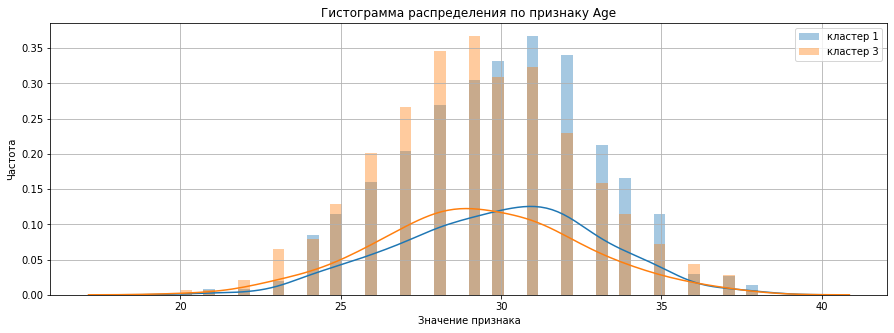

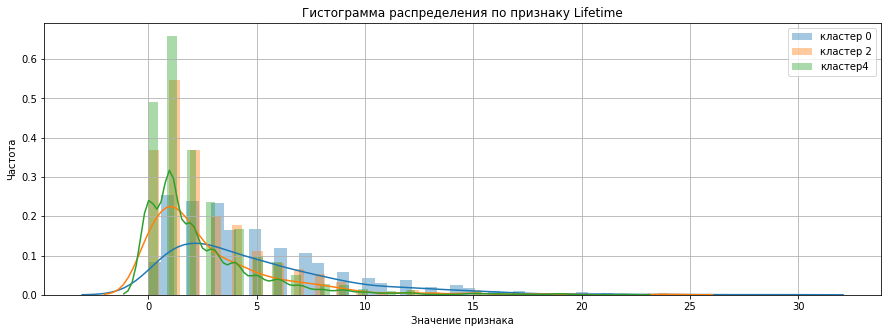

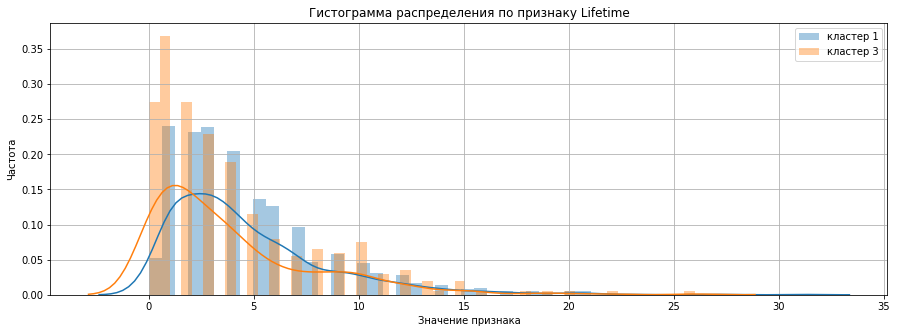

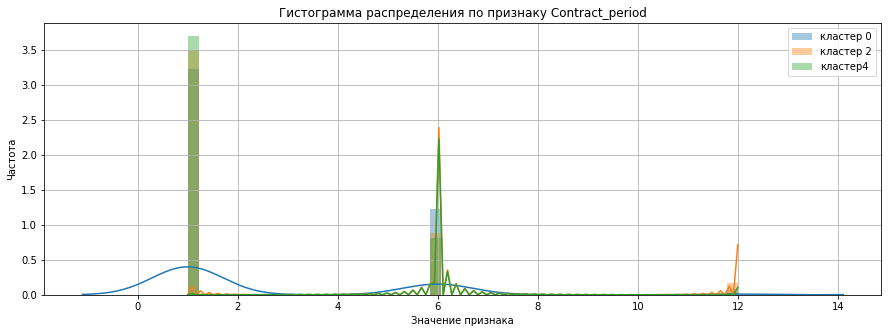

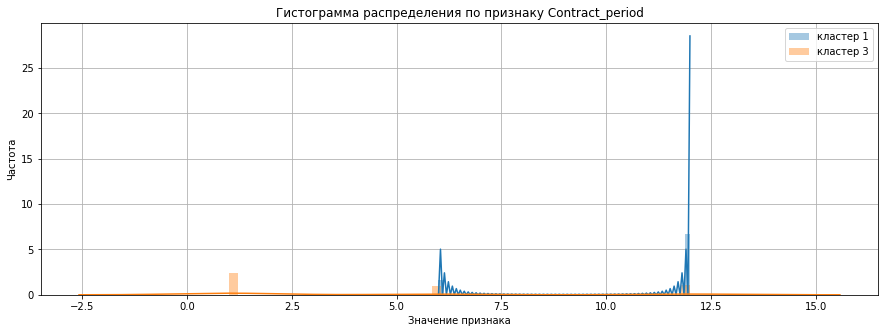

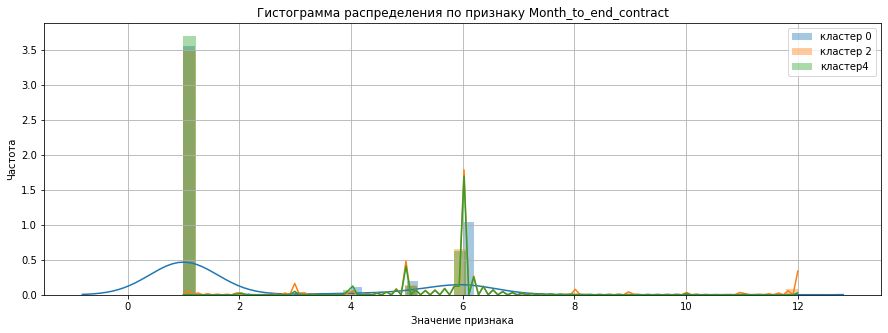

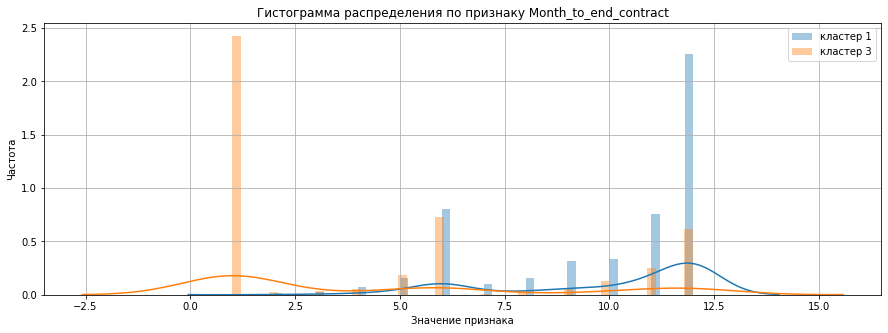

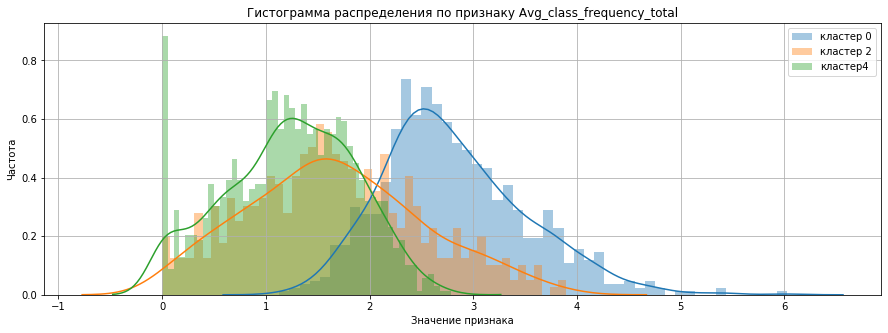

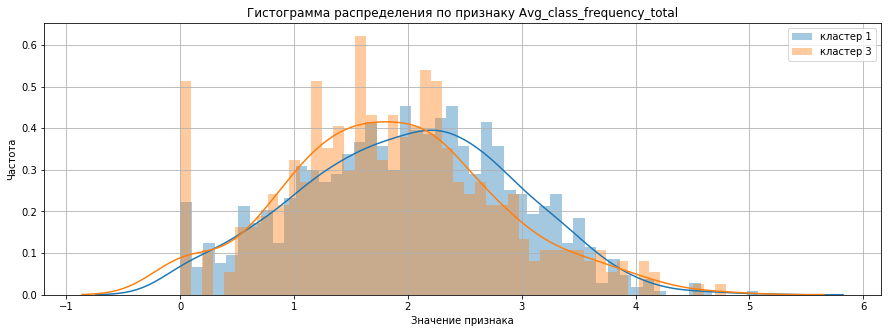

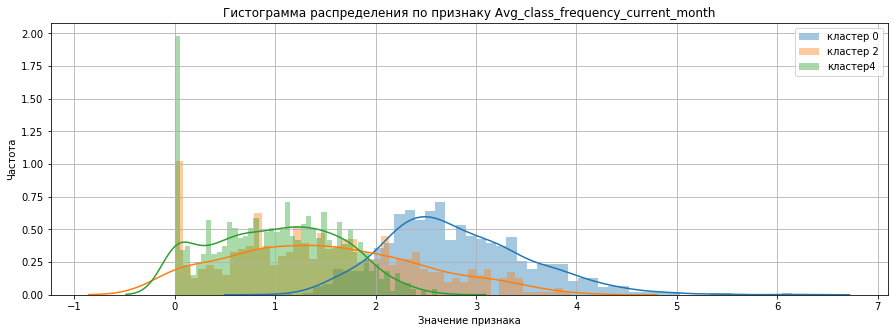

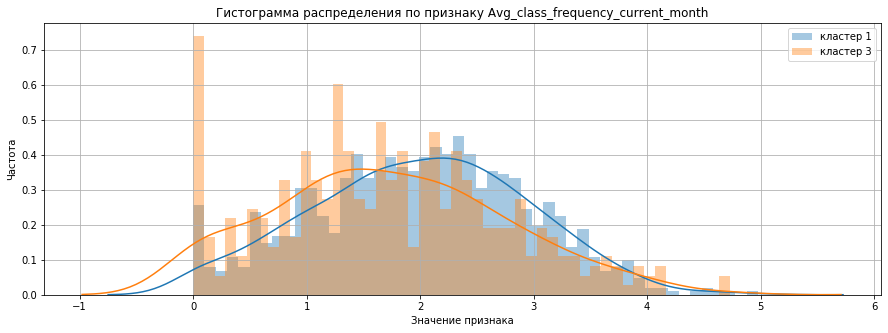

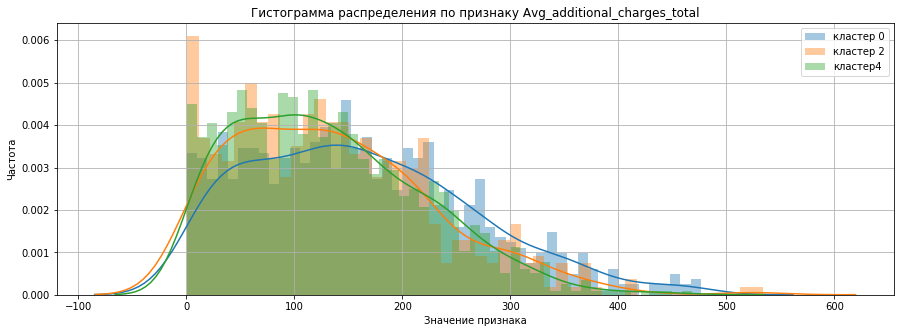

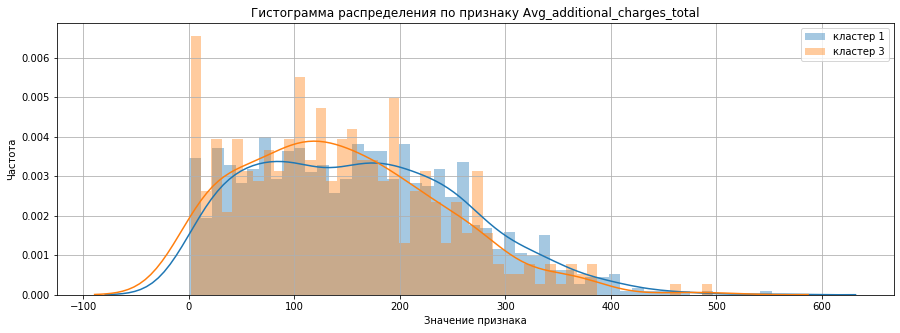

In [47]:
non_binar_features = ['Age', 'Lifetime', 'Contract_period', 'Month_to_end_contract', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']
hist_for_clusters_non_binar(gym, non_binar_features)

На основании полученных гистограмм можно сделать следующие выводы:
    * Среди кластеров 0 и 1 чуть больше возрастных клиентов
    * Для клиентов кластеров 2 и 4 прошло больше времени с момента первого обращения, чем для клиентов кластера 0, также для клиентов кластера 1 период с момента первого обращения меньше, чем для кластера 3. 
    * В кластере 4 больше всего коротких контрактов и практически нет длинных, большинство контрактов для клиентов кластера 0 менее полугода, а в кластере 2 есть небольшое количество клиентов с годовыми контрактами
    * В кластере 3 больше коротких контрактов, чем в кластере 1, в кластере 1 длительность контрактов составляет не менее полугода
    * В кластере 4 больше всего клиентов с завершающимся контрактом, в кластере 1 в основном клиенты с недавно открытыми длительными контрактами
    * Клиенты кластера 0 значительно чаще посещают зал, чем клиенты кластеров 2 и 4, для клиентов кластера 4 характерен выброс в районе нулевой посещаемости, то есть многие клиенты этого кластера не посещают фитнес-центр
    * Клиенты кластера 3 значительно реже посещают зал, чем клиенты кластера 1
    * Многие клиенты кластеров 3 и 4 не посещали в зал в прошедшем месяце 
    * Клиенты кластеров 2 и 4 тратят меньше на дополнительные услуги, чем клиенты кластера 0, клиенты кластера 3 тратят больше, чем клиенты кластера 1. 

Соответственно, можно сделать вывод, что кластеры 0, 1 и 3 представляют наибольший интерес, среди них мало клиентов ушедших в отток, они больше всего тратят на дополнительные услуги, чаще всего посещают фитнес-центров. Кластеры 2 и 4 являются наименее интересным - эти клиенты меньше всего тратят на дополнительные услуги, редко посещают зал, среди них очень много ушедших клиентов. Клиенты кластера 2 это наиболее молодые клиенты, среди которых практически нет сотрудников компаний-партнеров, заключающие контракт вскоре после первого обращения, они проживают или работают вблизи фитнес-центра, заключают в основном короткие контракты длительность не более полугода. Клиенты кластера 4 это клиенты, заключающие короткий контракт всеоре после первого обращения, они живут и работают далеко от фитнес-центра. 

Для оценки взаимосвязи между частотой посещения зала и расходами на дополнительные услуги построим график попарных признаков для кластеров.

In [58]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name], hue = df[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

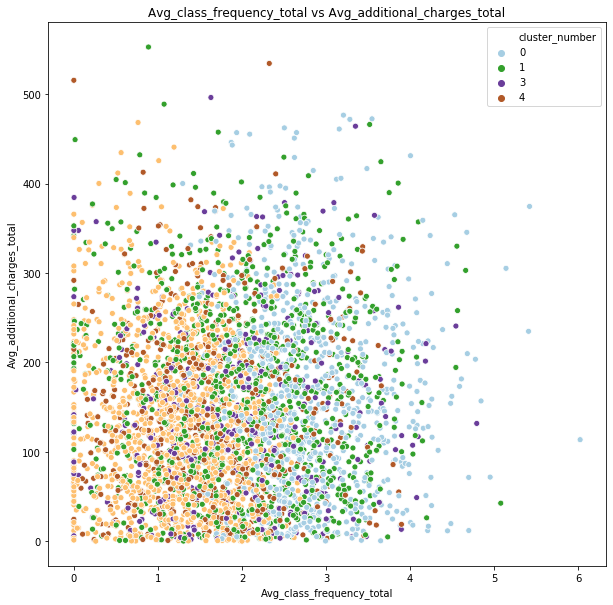

In [59]:
show_clusters_on_plot(gym, 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'cluster_number')

Хорошо видно, что клиенты нулевого кластера чаще всего посещают зал и также тратят больше, но также видно, что хотя клиенты кластера 2 и редко посещают зал, но все же среди них хватает клиентов, которые готовы тратить деньги на дополнительные услуги, поэтому клиенты кластера 4 являются все же менее выгодными, чем клиенты кластера 2. 

<a id='the_destination20'></a>
## 4.4. Расчет доли оттока по каждому кластеру

In [64]:
display(gym.groupby(by=['cluster_number']).agg({'Churn' : 'mean'}))

,Churn
cluster_number,
0,0.074292
1,0.027424
2,0.519386
3,0.266839
4,0.441815


In [ ]:
Наибольшие значения доли оттока характерны для кластеров 2 и 4. 

<a id='the_destination21'></a>
# Вывод по разделу 4.

На основе проведенного анализа можно сказать, что Можно сказать, что кластер 0 это часто посещающие зал клиенты с коротким контрактом, живущие и работающие вблизи зала, кластер 1 клиенты с длительными контрактами, указавшие номер телефона, кластер 2 - редко посещающие зал клиенты с коротким контрактом, живущие и работающие вблизи зала, кластер 3 - клиенты с длительными контрактами, не указавшие номер телефона, кластер 4 - клиенты с короткими контрактами, живущие и работающие далеко от фитнес-центра. Среди клиентов кластера 3 много сотрудников компаний-партнеров.
Кластеры 0, 1 и 3 представляют наибольший интерес, среди них мало клиентов ушедших в отток, они больше всего тратят на дополнительные услуги, чаще всего посещают фитнес-центров. Кластер 4 является наименее интересным - эти клиенты меньше всего тратят на дополнительные услуги, редко посещают зал, среди них очень много ушедших клиентов. Среди клиентов кластера 2 большой отток, однако эти клиенты готовы тратить деньги на дополнительные услуги, поэтому их целесообразно активно удерживать.
Хотя отток в кластерах 0, 1, 3 не высок, однако необходимо стремиться к минимизации оттока, особенно в кластере 3, так как они больше тратят на дополнительные услуги.

<a id='the_destination22'></a>
# Общий вывод и рекомендации

Отток наиболее характерен для клиентов с краткосрочными контрактами кластеров 2 и 4. Ни один из этих кластеров не заинтересован в групповых занятиях, поэтому нецелесообразно увеличивать насыщение и программу груповых занятий. Клиенты группы 4 живут и работают не рядом с фитнес-центром, поэтому у них не пользуются спросом дополнительные услуги, но так как среди них достаточно много сотрудников компаний-партнеров фитнес-центра, то один из возможных вариантов это организация групповых дистанционных занятий в рамках основных офисов компаний-партнеров, например, танцевальных марафонов, или же тренировок в рамках фитнес-центра однако с вовлечением сотрудников компании в конкурентную гонку с другими сотрудниками. Так как клиенты кластера 2 готовы тратить деньги на дополнительные услуги, то повысить удержание также могут помочь скидки и акции на дополнительные услуги. 
Кластеры 1 и 3 являются кластерами с высоким коэффициентом удержания, также они являются клиентами с длительными контрактами, для таких клиентов целесообразно разнообразить групповые занятия, добавить уникальные тренировки для тех, кто часто ходит в зал, например, с ведущими фитнес-тренерами или консультации специалистов нутрициологов. Целесообразно внедрить систему накопительных скидок на дополнительные услуги.
Так как среди кластеров 2 и 4 достаточно много клиентов с подходящими к концу контрактами - то есть вероятность, что снижение активности клиента связано с угасанием интереса к посещению фитнес центра после того, как проходит более половины времени контракта, поэтому целесообразно отслеживать активность клиентов после того как прошла половина длительности контракта. Так как у многих людей угасание интереса к тренировкам связано с разочарованием от отсутствия быстрых результатов, то в этот период можно предложить скидки на консультации нутрициологов, услуги массажистов и частные тренировки. 